In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os 

Notes: 
- the peak at the end seems like it is there due to the shift in the vortex trajectories. The relative differences stay constant despite trying to cut off the end of the samples because if the samples are the same length at the beginning and then the same amount is cut off, it doesn't affect their offset that causes one trajectory to end up being longer after shifting. This is why the feature of the upshoot at the end is constant even if time is cut off at the beginning. 

In [2]:
sample_arr = np.loadtxt('csvT1_S200_s500000_alltraj.csv')
avg_arr = np.loadtxt('csvT1_S200_s500000.csv')
orig_samples = sample_arr.copy() 

In [3]:
sample_arr = np.loadtxt('csvT1_S200_s500000_alltraj.csv')
avg_arr = np.loadtxt('csvT1_S200_s500000.csv')

print(sample_arr.shape)

time0 = 300 # initial time to start counting 
sample_arr = sample_arr.T[time0:]# throw away the parts of the array that are at t < time0 
distance0 = 10.2 # threshold distance - everything that reaches this point after t = time0 can be counted 


sample_arr = sample_arr.T
orig_samples = sample_arr.copy() 
print(sample_arr.shape)

(200, 2002)
(200, 1702)


In [4]:
# filter to choose the parts of the array that are counted: 
num_removed = 0 
for i in range(len(sample_arr)): 
    if sample_arr[i][0] > distance0:
        num_removed += 1 
        sample_arr[i] = np.full(len(sample_arr[i]), np.nan) # set the array to nan to eliminate it 
print(num_removed/len(sample_arr))

valid_trajectories = [] 
threshold_time = [] 

added = 0
for i in range(len(sample_arr)): # iterate over the samples 
    for j in range(len(sample_arr[0])): # iterate over time 
        if sample_arr[i][j] != np.nan and sample_arr[i][j] >= distance0: 
            added+= 1
            time = j 
            threshold_time.append(j)
            valid_trajectories.append(sample_arr[i].copy())
            sample_arr[i] = np.full(len(sample_arr[i]), np.nan) # set the row equal to nan to avoid repeats
            continue  




0.205


In [5]:
# stats
too_high = num_removed/len(sample_arr) 
too_low = (len(sample_arr) - added - num_removed)/len(sample_arr)
print(too_high) 
print(too_low)
print(too_high+too_low)


0.205
0.445
0.65


In [6]:
# distances = np.arange(9, 11, 0.1)

# throw_away_per = np.zeros_like(distances)


# time0 = 300 # initial time to start counting 
# # throw away the parts of the array that are at t < time0
# for d in range(len(distances)): 
#     sample_arr = orig_samples.copy() 
#     sample_arr = sample_arr.T[time0:]
#     distance0 = distances[d] # threshold distance - everything that reaches this point after t = time0 can be counted 


#     sample_arr = sample_arr.T
#     num_removed = 0 
#     for i in range(len(sample_arr)): 
#         if sample_arr[i][0] > distance0:
#             num_removed += 1 
#             sample_arr[i] = np.full(len(sample_arr[i]), np.nan) # set the array to nan to eliminate it 


#     valid_trajectories = [] 
#     threshold_time = [] 

#     added = 0
#     for i in range(len(sample_arr)): # iterate over the samples 
#         for j in range(len(sample_arr[0])): # iterate over time 
#             if sample_arr[i][j] != np.nan and sample_arr[i][j] >= distance0: 
#                 added+= 1
#                 time = j 
#                 threshold_time.append(j)
#                 valid_trajectories.append(sample_arr[i].copy())
#                 sample_arr[i] = np.full(len(sample_arr[i]), np.nan) # set the row equal to nan to avoid repeats
#                 continue

#     too_high = num_removed/len(sample_arr) 
#     too_low = (len(sample_arr) - added - num_removed)/len(sample_arr)
#     print("Distance: ", distances[d])
#     print(too_high) 
#     print(too_low)
#     print(too_high+too_low)
#     throw_away_per[d] = too_high + too_low


In [8]:
# plt.plot(distances, throw_away_per, marker = 'o')
# plt.grid(True)

In [9]:
print(np.shape(valid_trajectories))
print(np.shape(orig_samples))

(70, 1702)
(200, 1702)


In [10]:
# plt.figure() 
# for i in range(len(sample_arr)): 
#     if sample_arr[i].all() != np.nan: 
#         plt.plot(sample_arr[i], marker = 'o', label = i)
#plt.legend() 

0
1
2
3
4
5
6
7
8


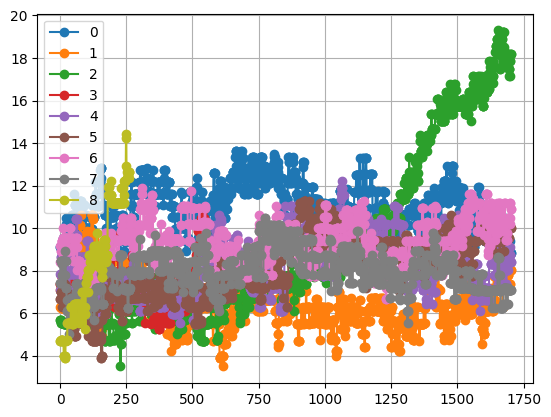

In [11]:
for i in range(9): 
    print(i)
    plt.plot(np.linspace(0,len(valid_trajectories[i]),len(valid_trajectories[i])), valid_trajectories[i], marker = 'o', label = i)
plt.legend() 
plt.grid(True)

In [12]:
# #default_x = np.linspace(0,len(threshold_time), len(threshold_time))
# for i in range(40,50): 
#     xaxis = np.linspace(-threshold_time[i], len(valid_trajectories[i])-threshold_time[i], len(valid_trajectories[i]))
#     plt.plot(xaxis, valid_trajectories[i])
#     plt.vlines(0, 4, 20, linewidth = 3, color = 'black')
#     plt.hlines(9, -500, 1500, linewidth = 3, color = 'black')
#     plt.xlim(-1,1)
#     plt.ylim(8,10)


In [13]:
# remove trajectory values that correspond to negative time
valid_trajectories_0start = [] 
max_length = max(map(len, valid_trajectories))

#print(max_length)
for i in range(len(valid_trajectories)): 
    # xaxis = np.linspace(-threshold_time[i], len(valid_trajectories[i])-threshold_time[i], len(valid_trajectories[i]))
    # ind = np.where(np.abs(xaxis) < 0.1 )[0]
    # print(xaxis[0:20])
    # print(ind)

    adjusted_trajectory = valid_trajectories[i][threshold_time[i]:]
    # print(threshold_time[i])
    # print(np.shape(adjusted_trajectory))
    padded_trajectory = np.pad(adjusted_trajectory, (0,max_length-len(adjusted_trajectory)), 'constant', constant_values = np.nan)
    
    valid_trajectories_0start.append(np.pad(adjusted_trajectory, (0,max_length-len(adjusted_trajectory)), 'constant', constant_values = np.nan)) 
    

In [14]:
print(np.shape(valid_trajectories_0start))

(70, 1702)


In [16]:
# for i in range(100,120): 
#     plt.plot(valid_trajectories_0start[i], marker = 'o')
# #plt.plot(avg_shifted_traj, marker = 'o', linewidth = 3, color = 'black')
# plt.grid(True)
# # calculate the average

In [17]:
# plt.figure() 
# #for i in range(len(valid_trajectories_0start[0:20])): 
# for i in range(100, 102):
#     plt.plot(valid_trajectories_0start[i], marker = 'o', label = i)
#     print(len(valid_trajectories_0start[i]))
# avg_shifted_traj = np.ma.average(np.ma.masked_array(valid_trajectories_0start[100:102], np.isnan(valid_trajectories_0start[100:102])), axis = 0)
# #plt.legend() 

# plt.plot(avg_shifted_traj, marker = 'o', linewidth = 3, color = 'black')
# plt.grid(True)

In [18]:
# plt.figure() 
# for i in range(len(valid_trajectories_0start)): 
#     plt.plot(valid_trajectories_0start[i], marker = 'o', label = i)
# avg_shifted_traj = np.ma.average(np.ma.masked_array(valid_trajectories_0start, np.isnan(valid_trajectories_0start)), axis = 0)
# #plt.legend() 

# plt.plot(avg_shifted_traj, marker = 'o', linewidth = 3, color = 'black')
# plt.grid(True)

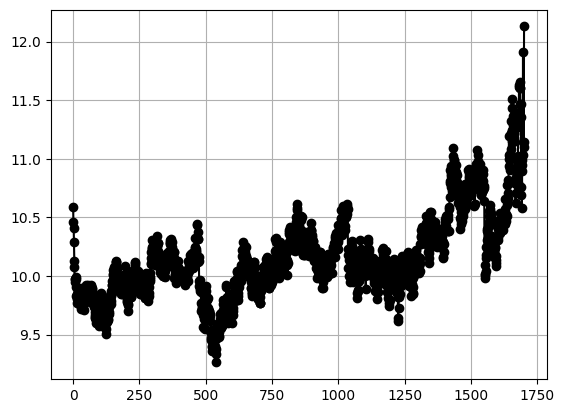

In [19]:
avg_shifted_traj = np.ma.average(np.ma.masked_array(valid_trajectories_0start, np.isnan(valid_trajectories_0start)), axis = 0)
plt.figure() 
plt.plot(avg_shifted_traj, marker = 'o', color = 'black')
plt.grid(True)

In [20]:
print(avg_shifted_traj)

[10.59120700208023 10.460812310576246 10.413467196204909 ...
 11.142255740726572 12.128261481453144 --]


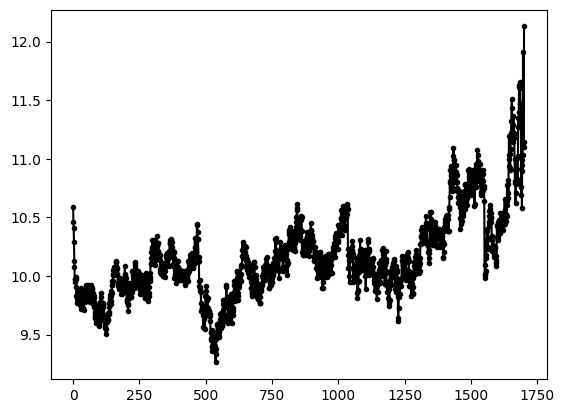

In [23]:
# plt.plot(avg_arr, marker = 'o')
plt.plot(avg_shifted_traj, marker = 'o', color = 'black', markersize = 3)
# plt.vlines(300,2,11)
# plt.hlines(9.2,0,2000)